In [1]:
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client = MongoClient('localhost', 27017)
db = client.maniva_db
collection = db.maniva_webapp_contact

In [3]:
corpus = list()
message_len = list()

for entry in collection.find({},{'subject','message'}):
    corpus.append(entry['subject'])
    corpus.append(entry['message'])
    message_len.append(len(entry['message']))

print(corpus[:6])

['Python', 'What are the programming languages that your company is working with?', 'Questions concerning the cloud', 'Do we have cloud options for big data that can allow us to properly deploy the model in real-world settings', 'Languages', 'What are the languages that are available for Python and data analytics?']


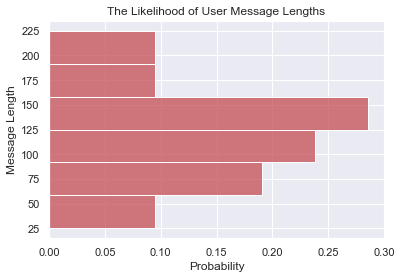

In [4]:
sns.set_theme(style="darkgrid")
ax=sns.histplot(y=message_len, color='r', stat='probability')
ax.set(xlabel='Probability', ylabel='Message Length',title='The Likelihood of User Message Lengths')
plt.show()

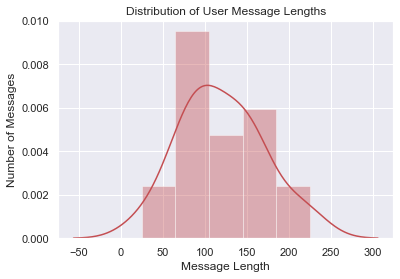

In [5]:
ax=sns.distplot(message_len, color='r')
ax.set(xlabel='Message Length', ylabel='Number of Messages',title='Distribution of User Message Lengths')
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

In [8]:
features = vectorizer.get_feature_names()
print(features)

['allow', 'analytics', 'apply', 'area', 'available', 'backend', 'best', 'better', 'big', 'boost', 'bring', 'building', 'business', 'choosin', 'closer', 'cloud', 'cms', 'comes', 'company', 'concerning', 'concerns', 'considering', 'consultation', 'consultations', 'consulting', 'crm', 'customer', 'data', 'database', 'databases', 'deep', 'depend', 'deploy', 'deployed', 'developers', 'development', 'difference', 'differences', 'different', 'difficulty', 'django', 'does', 'don', 'engagement', 'experience', 'express', 'feel', 'flask', 'frameworks', 'free', 'fresh', 'frontend', 'getting', 'graph', 'handles', 'hard', 'hello', 'help', 'improve', 'improving', 'integration', 'interaction', 'javascript', 'js', 'keras', 'know', 'languages', 'learning', 'let', 'like', 'looking', 'machine', 'mainly', 'management', 'migrate', 'migrating', 'model', 'models', 'mongo', 'necessary', 'need', 'needs', 'neo4j', 'new', 'node', 'nosql', 'older', 'options', 'past', 'possible', 'programming', 'project', 'proper',

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

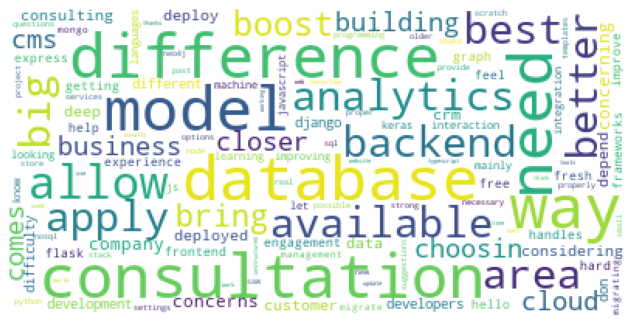

In [10]:
from wordcloud import WordCloud

s = ', '.join(features)
wordcloud = WordCloud().generate(s)
wordcloud = WordCloud(background_color='white',max_words=len(features),max_font_size=40).generate(s)
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
# Applying GPT-2 with user messages to see how they would be generated
from libra import client

with open("corpus.txt", "w") as output:
    output.write(', '.join(corpus[:5]))

messages_client = client("corpus.txt")
messages_client.generate_text("generate some text please", return_sequences=1)
print(messages_client.models['text_generation']['generated_text'])

Creating client object
  |- Reading in dataset


              |- Generating text now...

0: Python, What are the programming languages that your company is working with?, Questions concerning the cloud, Do we have cloud options for big data that can allow us to properly deploy the model in real-world settings, Languages that are not available in the cloud, and so on.

I'm going to start with the most important question that I have.

What is the most important thing that you have to do to get the most out of your data?

The most important thing that I have to do is to understand the data.

What is the most important thing that you have to do to get the most out of your data?

The most important thing that I have to do is to understand the data.

What is the most important thing that you have to do to get the most out of your data?

The most important thing that I have to do is to understand the data.

What is the most important thing that you have to do to get the most out of your data